In [1]:
from fig_2_Helper import *

params=fig_2()

# load pop_stats and rasters
params.rasters_raw=fig_2.load_data(params,raster=False)
params.pop_stats_raw=pd.read_csv(
    r"D:\Reduced_Datasets_v1\figures\data\pop_stats_raw_2nd_derv_new_class_V11_130423.csv")


C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (44,104,108,109,111) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:


pop_stats_all_2 = fig_2.make_data(params,['VPL'])

C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [4]:
# define  plot params 
plt.style.use('default')
rcParams['font.family'] = 'Arial'
rcParams['axes.linewidth'] = .5
rcParams['lines.linewidth'] = .5
rcParams['font.size'] = 7
rcParams['figure.dpi'] = 300
rcParams['xtick.labelsize']=7
rcParams['ytick.labelsize']=7
rcParams["errorbar.capsize"]=3
rcParams['xtick.major.width']=.5
rcParams["xtick.minor.width"]=.5
rcParams['ytick.major.width']=.5
rcParams["ytick.minor.width"]=.5

In [5]:
allen = fig_2.init_allen_sdk(params)

params.mcc=allen[0]
params.structure_tree = allen[1]

masks = fig_2.prepare_masks(params)

params.masks_h = masks[0]
params.masks_s = masks[1]
params.masks_c = masks[2]

In [6]:
# scale coords to template axes
params.pop_stats_raw.loc[:,'AP_template']=np.ceil((params.pop_stats_raw.loc[:,'AP'].values*-1+5400)/10).astype(int)
params.pop_stats_raw.loc[:,'ML_template']=(np.ceil(((params.pop_stats_raw.loc[:,'ML'].values)) + 5700)/10).astype(int)
params.pop_stats_raw.loc[:,'DV_template'] = (params.pop_stats_raw.DV.values/10).astype(int)

0
(720, 121)
1
(516, 121)


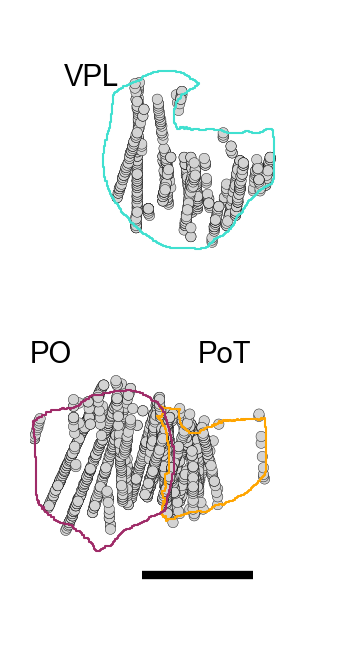

In [7]:
nums = fig_2.plot_cell_location_2(params)

In [8]:
fig,ax = plt.subplots()
outlines=fig_2.plot_outlines(params.masks_s['VPL'], lw=1,
                              ax=ax,color='black',label='VPL')
plt.close()

outlines_large=np.zeros(outlines[0].shape)
outlines_large[:,0]=5400-outlines[0][:,0]*10
outlines_large[:,1]=outlines[0][:,1]*10


In [9]:
(f_null, f_null_margx, f_null_margy, xx,
 yy,positions_margx, positions_margy,
 kernel_margx,kernel_margy,positions) = fig_2.compute_null_dist(params,outlines,['VPL'])

In [10]:
def F (x, y):
		return x**4 * y

In [11]:
# Call the function with the default x and y ranges, using F(x, y)
_,counts = fig_2.integrate_2D_surface(F,f_null=f_null, positions_margx=positions_margx, positions_margy=positions_margy)

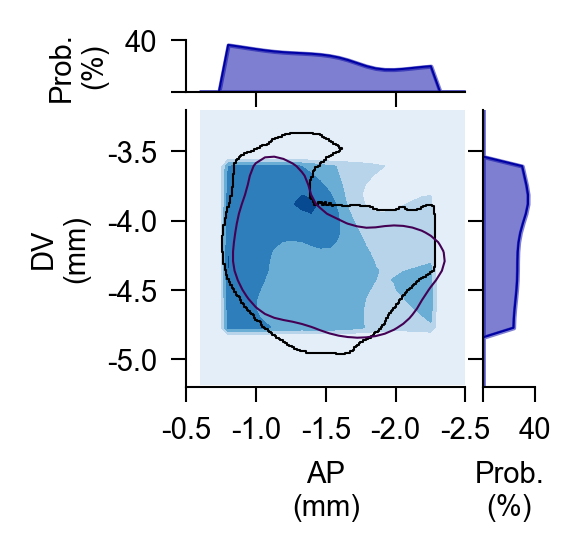

In [13]:
# Assuming pop_stats_all_cold, xx, positions, positions_margx, and positions_margy are already defined
f_cold, f_cold_margx, f_cold_margy = fig_2.compute_dist(pop_stats_all_2,['VPL'],'cold', xx, positions, positions_margx, positions_margy)


# Assuming all necessary inputs (f_cold, f_null, xx, yy, etc.) are defined
f_cold_norm, f_cold_margx_norm, f_cold_margy_norm = fig_2.norm_dist(
    f_cold, f_null, f_cold_margx, f_null_margx, f_cold_margy, f_null_margy, 
    xx, yy, outlines_large, positions_margx, positions_margy, counts)

# Assuming all necessary inputs (xx, yy, f_cold_norm, counts, etc.) are defined
fig_2.plot_dist(xx, yy, f_cold_norm, counts, outlines_large, positions_margx,
                    f_cold_margx_norm, positions_margy, f_cold_margy_norm, params,'Blues',.4,params.blue,6,
               -500,-2500,5,3000,5000,5,200)

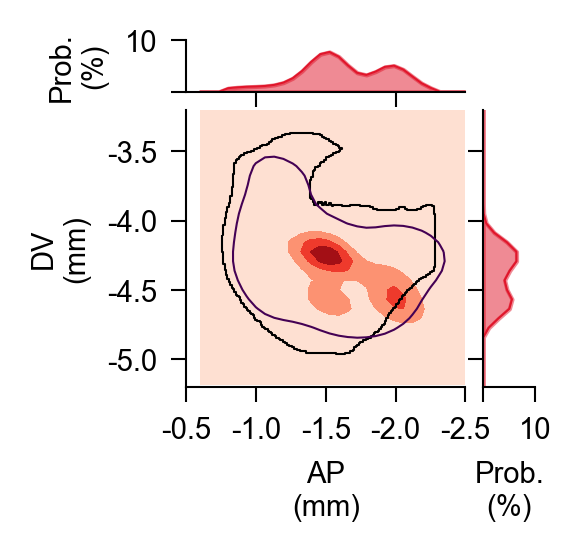

In [14]:
# Assuming pop_stats_all_warm, xx, positions, positions_margx, and positions_margy are already defined
f_warm, f_warm_margx, f_warm_margy = fig_2.compute_dist(pop_stats_all_2,['VPL'],'warm', xx, positions, positions_margx, positions_margy)


# Assuming all necessary inputs (f_warm, f_null, xx, yy, etc.) are defined
f_warm_norm, f_warm_margx_norm, f_warm_margy_norm = fig_2.norm_dist(
    f_warm, f_null, f_warm_margx, f_null_margx, f_warm_margy, f_null_margy, 
    xx, yy, outlines_large, positions_margx, positions_margy, counts)

# Assuming all necessary inputs (xx, yy, f_warm_norm, counts, etc.) are defined
fig_2.plot_dist(xx, yy, f_warm_norm, counts, outlines_large, positions_margx,
                    f_warm_margx_norm, positions_margy, f_warm_margy_norm, params,'Reds',.1,params.red,5,
               -500,-2500,5,3000,5000,5,200)


In [31]:
%run fig_2_Helper.py

In [32]:
fig,ax=plt.subplots()

outlines_PO=fig_2.plot_outlines(params.masks_s['PO'], lw=1,
                              ax=ax,color='black',label='PO')
outlines_PoT=fig_2.plot_outlines(params.masks_s['PoT'], lw=1,
                              ax=ax,color='black',label='PoT')
plt.close()

mask = (params.masks_s['PO'] + params.masks_s['PoT'] )

mask[mask>1] = 1

outlines_PoT_large=np.zeros(outlines_PoT[0].shape)
outlines_PoT_large[:,0]=5400-outlines_PoT[0][:,0]*10
outlines_PoT_large[:,1]=outlines_PoT[0][:,1]*10


outlines_PO_large=np.zeros(outlines_PO[0].shape)
outlines_PO_large[:,0]=5400-outlines_PO[0][:,0]*10
outlines_PO_large[:,1]=outlines_PO[0][:,1]*10

In [33]:
(f_null, f_null_margx, f_null_margy, xx,
 yy,positions_margx, positions_margy,
 kernel_margx,kernel_margy,positions) = fig_2.compute_null_dist(params,outlines,['PO','PoT'])

# Call the function with the default x and y ranges, using F(x, y)
_,counts = fig_2.integrate_2D_surface(F,f_null=f_null, positions_margx=positions_margx, positions_margy=positions_margy)

In [34]:
pop_stats_all_2 = fig_2.make_data(params,['PO','PoT']) 

C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


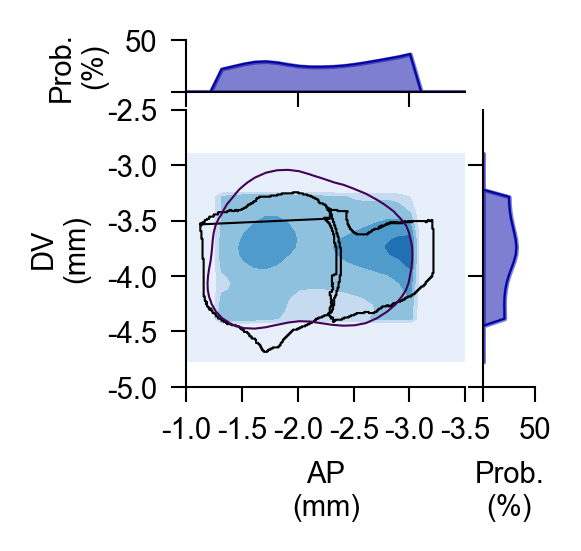

In [35]:
f_cold, f_cold_margx, f_cold_margy = fig_2.compute_dist(pop_stats_all_2,['PO','PoT'],'cold', xx, positions, positions_margx, positions_margy)

outlines_large = np.concatenate((outlines_PoT_large,outlines_PO_large))

f_cold_norm, f_cold_margx_norm, f_cold_margy_norm = fig_2.norm_dist(
    f_cold, f_null, f_cold_margx, f_null_margx, f_cold_margy, f_null_margy, 
    xx, yy, outlines_large, positions_margx, positions_margy, counts)



fig_2.plot_dist(xx, yy, f_cold_norm, counts, outlines_large, positions_margx,
                    f_cold_margx_norm, positions_margy, f_cold_margy_norm, params,'Blues',.5,params.blue,7,
                   -1000,-3500,6,2500,5000,6,0)

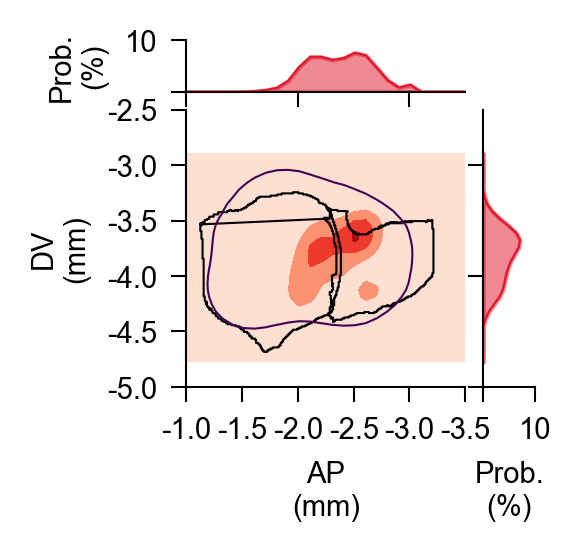

In [36]:
f_cold, f_cold_margx, f_cold_margy = fig_2.compute_dist(pop_stats_all_2,['PO','PoT'],'warm', xx, positions, positions_margx, positions_margy)

outlines_large = np.concatenate((outlines_PoT_large,outlines_PO_large))

f_cold_norm, f_cold_margx_norm, f_cold_margy_norm = fig_2.norm_dist(
    f_cold, f_null, f_cold_margx, f_null_margx, f_cold_margy, f_null_margy, 
    xx, yy, outlines_large, positions_margx, positions_margy, counts)



fig_2.plot_dist(xx, yy, f_cold_norm, counts, outlines_large, positions_margx,
                    f_cold_margx_norm, positions_margy, f_cold_margy_norm, params,'Reds',.1,params.red,5,
                   -1000,-3500,6,2500,5000,6,0)

In [37]:
file_path = r"D:\PWB\all_cells_050322.csv"

# Load and process anatomical data
thalamic_cells = fig_2.load_anatomy(file_path)

C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


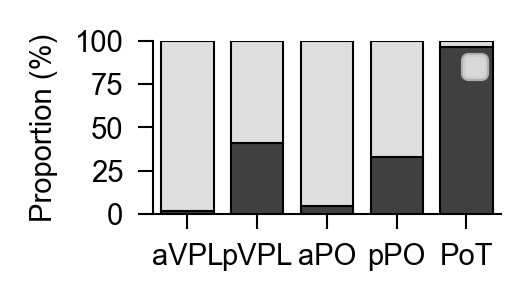

In [78]:
fig, ax = fig_2.plot_retrolabeled_cells(thalamic_cells)

In [86]:
%run fig_2_Helper.py

In [87]:
data_2 = fig_2.make_data_stats_ROI(params)

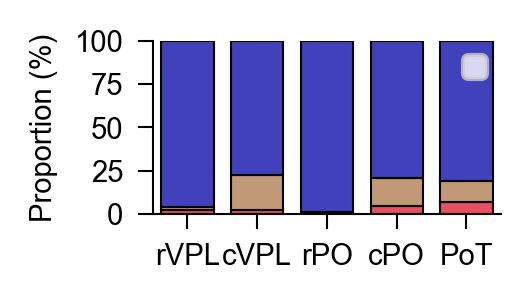

In [97]:
fig, ax = plot_resptype_fractions(data_2, order=['rVPL', 'cVPL', 'rPO', 'cPO', 'PoT'], 
                                  hue_order=['cold', 'cold/warm', 'warm'], 
                                  )



In [61]:
thalamic_cells.loc[:,'DV'] = thalamic_cells.y

C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_retropostions(data, structure=['VPL'], hue_column='projection', 
                       x_col='AP', y_col='DV', outlines=None, 
                       hue_order=['S1', 'IC'], palette=['green', 'magenta'],
                       levels=[0.05, 0.25, 0.5, 0.75, 1], 
                       fill=True, height=1.5, alpha=0.7,max_val=0.003,y1=3000, y2=5000, y_steps=5,
                       x1=-500, x2= -2500, x_steps=5,shift=200,
                       bw_adjust=1, marginal_ticks=True, save_path=None):
    """
    Function to create a KDE jointplot of retrogradely labeled positions.

    Parameters:
    - data: DataFrame containing the data to plot.
    - structure: String specifying which structure to filter the data (default: 'VPL').
    - hue_column: Column name in `data` for coloring based on different projections (default: 'projection').
    - x_col: Column name for the x-axis data (default: 'AP').
    - y_col: Column name for the y-axis data (default: 'DV').
    - outlines: Collection of outlines to overlay on the joint plot (optional).
    - hue_order: Order of hue categories to display (default: ['S1', 'IC']).
    - palette: Color palette for the hue categories (default: ['green', 'magenta']).
    - levels: Contour levels for KDE (default: [0.05, 0.25, 0.5, 0.75, 1]).
    - fill: Whether to fill the contours (default: True).
    - height: Height of the plot (default: 1.5).
    - alpha: Transparency level for the contours (default: 0.7).
    - bw_adjust: Bandwidth adjustment for KDE (default: 1).
    - marginal_ticks: Whether to show ticks on the marginal plots (default: True).
    - save_path: Path to save the figure as an SVG (optional).

    Returns:
    - g: Seaborn jointplot object.
    """

    # Filter data for the specified structure
    filtered_data = data.loc[data.structure.isin(structure)]

    # Create the jointplot
    g = sns.jointplot(data=filtered_data, x=x_col, y=y_col, kind='kde', hue=hue_column,
                      marginal_kws={'common_norm': False, 'bw_adjust': bw_adjust, 'linewidth': 0.5},
                      levels=levels, fill=fill, height=height, common_norm=False,
                      alpha=alpha, hue_order=hue_order, palette=palette,
                      bw_adjust=bw_adjust, marginal_ticks=marginal_ticks, legend=False)

    # Customize marginal plots (Y-axis)
    g.ax_marg_y.set_xticks([0, max_val])
    g.ax_marg_y.set_xticklabels(['', str(int(max_val*1000))])

    # Customize marginal plots (X-axis)
    g.ax_marg_x.set_yticks([0, max_val])
    g.ax_marg_x.set_yticklabels(['', str(int(max_val*1000))])

    # Add line collections for outlines if provided
    if outlines is not None:
        cl = LineCollection([outlines], color='black', lw=0.5)
        g.ax_joint.add_collection(cl)

    # Set joint plot tick labels and limits
    g.ax_joint.set_yticks(np.linspace(y1, y2, y_steps))
    g.ax_joint.set_yticklabels(np.linspace(-y1, -y2, y_steps) / 1000, fontsize=7)
    
    g.ax_joint.set_xticks(np.linspace(x1, x2, x_steps))
    g.ax_joint.set_xticklabels(np.linspace(x1, x2, x_steps) / 1000)

    g.ax_joint.set_ylim(y2+shift, y1+shift)
    g.ax_joint.set_xlim(x1, x2)

    # Set axis labels
    g.ax_joint.set_xlabel('AP Density\n(mm) $x10^{-3}$', fontsize=7)
    g.ax_joint.set_ylabel('DV\n(mm)', fontsize=7)

    # Optionally save the figure
    if save_path:
        plt.savefig(save_path, format='svg')

    plt.show()

    return g


In [111]:
fig,ax = plt.subplots()
outlines=fig_2.plot_outlines(params.masks_s['VPL'], lw=1,
                              ax=ax,color='black',label='VPL')
plt.close()

outlines_large=np.zeros(outlines[0].shape)
outlines_large[:,0]=5400-outlines[0][:,0]*10
outlines_large[:,1]=outlines[0][:,1]*10

C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


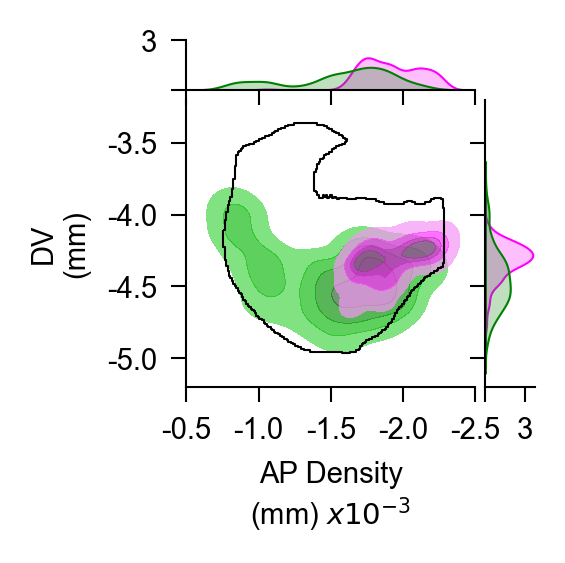

In [112]:
# Example call with optional arguments
g = plot_retropostions(thalamic_cells, 
                       structure=['VPL'], 
                       hue_column='projection', 
                       x_col='AP', 
                       y_col='DV', 
                       outlines=outlines_large, 
                       hue_order=['S1', 'IC'], 
                       palette=['green', 'magenta'], 
                       save_path=None)


In [ ]:
structure=['PO','PoT'], hue_column='projection', 
x_col='AP', y_col='DV', outlines=None, 
hue_order=['S1', 'IC'], palette=['green', 'magenta'],
levels=[0.05, 0.25, 0.5, 0.75, 1], 
fill=True, height=1.5, alpha=0.7,max_val=0.003,y1=3000, y2=5000, y_steps=5,
x1=-500, x2= -2500, x_steps=5,shift=200,
bw_adjust=1, marginal_ticks=True, save_path=None

In [113]:
fig,ax=plt.subplots()

outlines_PO=fig_2.plot_outlines(params.masks_s['PO'], lw=1,
                              ax=ax,color='black',label='PO')
outlines_PoT=fig_2.plot_outlines(params.masks_s['PoT'], lw=1,
                              ax=ax,color='black',label='PoT')
plt.close()

mask = (params.masks_s['PO'] + params.masks_s['PoT'] )

mask[mask>1] = 1

outlines_PoT_large=np.zeros(outlines_PoT[0].shape)
outlines_PoT_large[:,0]=5400-outlines_PoT[0][:,0]*10
outlines_PoT_large[:,1]=outlines_PoT[0][:,1]*10


outlines_PO_large=np.zeros(outlines_PO[0].shape)
outlines_PO_large[:,0]=5400-outlines_PO[0][:,0]*10
outlines_PO_large[:,1]=outlines_PO[0][:,1]*10


outlines_PO_complex = np.concatenate((outlines_PO_large,outlines_PoT_large))

C:\Users\tobiasleva\.conda\envs\BrainRender3\lib\site-packages\seaborn\axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


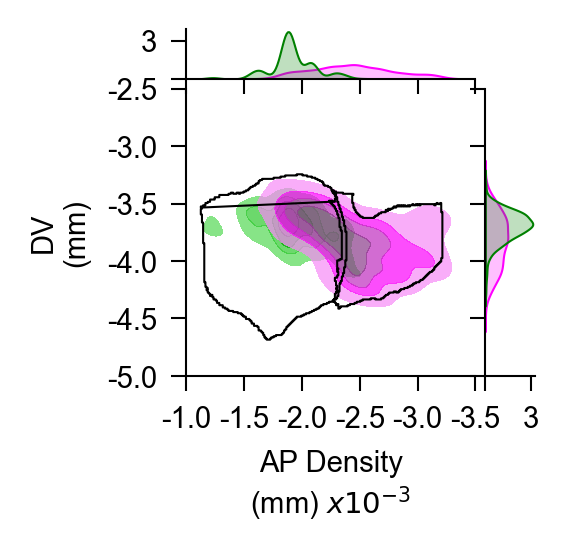

In [116]:
# Example call with optional arguments
g = plot_retropostions(thalamic_cells,structure=['PO','PoT'], hue_column='projection', 
                        x_col='AP', y_col='DV', outlines=outlines_PO_complex, 
                        hue_order=['S1', 'IC'], palette=['green', 'magenta'],
                        levels=[0.05, 0.25, 0.5, 0.75, 1], 
                        fill=True, height=1.5, alpha=0.7,max_val=0.003,y1=2500, y2=5000, y_steps=6,
                        x1=-1000, x2= -3500, x_steps=6,shift=0,
                        bw_adjust=1, marginal_ticks=True, save_path=None)
